# Data Pre-Processing

## Dealing with [*Missing* Data](https://en.wikipedia.org/wiki/Missing_data)

In most online _machine learning_ classes you are taught that when your data set is **incomplete** you can either:
1. Erase the corresponding rows with missing cells; or
2. _Impute_ (fill) the sample average of each column into those missing cells.

It turns out that the second option would require stronger assumptions than the first. If the observations are **missing completely at random** and your sample is i.i.d., the first option is harmless for large data sets.

## Encoding [Categorical Variables](https://en.wikipedia.org/wiki/Categorical_variable)

💻 Consider the ```hprice3``` data set from the ```wooldridge``` package:

In [1]:
## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

data(hprice3)

## Obs:   321

##  1. year                     1978, 1981
##  2. age                      age of house
##  3. agesq                    age^2
##  4. nbh                      neighborhood, 1 to 6
##  5. cbd                      dist. to central bus. dstrct, feet
##  6. inst                     dist. to interstate, feet
##  7. linst                    log(inst)
##  8. price                    selling price
##  9. rooms                    # rooms in house
## 10. area                     square footage of house
## 11. land                     square footage lot
## 12. baths                    # bathrooms
## 13. dist                     dist. from house to incin., feet
## 14. ldist                    log(dist)
## 15. lprice                   log(price)
## 16. y81                      =1 if year = 1981
## 17. larea                    log(area)
## 18. lland                    log(land)
## 19. linstsq                  linst^2

Loading required package: wooldridge


💻 Variables ```y81```, ```rooms```, and ```nbh``` are examples of <ins>categorical</ins> variables. In Econometrics, ```y81``` is called a standard dummy variable, ```rooms``` is called an _ordered_ categorical variable, ```nbh``` is called an _unordered_ categorical variable. Both ```rooms``` and ```nbh``` have _multiple_ categories. The fucntion ```as.factor()``` with option ```ordered=TRUE``` and ```ordered=FALSE``` (default) will allow us to handle them accordingly in all analysis.

In [2]:
## without using the 'as.factor' function
attach(hprice3)
no.factor <- data.frame(y81=y81,rooms=rooms,nbh=nbh)
summary(no.factor)
detach(hprice3)

## using the 'factor' function
attach(hprice3)
yes.factor <- data.frame(y81=factor(y81),
                         rooms=factor(rooms,ordered=TRUE),
                         nbh=factor(nbh,ordered=FALSE)
                         )
summary(yes.factor)
detach(hprice3)

      y81             rooms             nbh       
 Min.   :0.0000   Min.   : 4.000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.: 6.000   1st Qu.:0.000  
 Median :0.0000   Median : 7.000   Median :2.000  
 Mean   :0.4424   Mean   : 6.586   Mean   :2.209  
 3rd Qu.:1.0000   3rd Qu.: 7.000   3rd Qu.:4.000  
 Max.   :1.0000   Max.   :10.000   Max.   :6.000  

 y81     rooms    nbh    
 0:179   4 :  4   0:121  
 1:142   5 : 30   1: 27  
         6 : 96   2: 47  
         7 :169   3:  7  
         8 : 10   4: 60  
         9 : 11   5: 27  
         10:  1   6: 32  


**<span style="color:green">Exercise:</span>**: Plot a histogram of the variable ```rooms``` when it is not treated as a factor and when it is treated as an ```ordered=TRUE``` factor


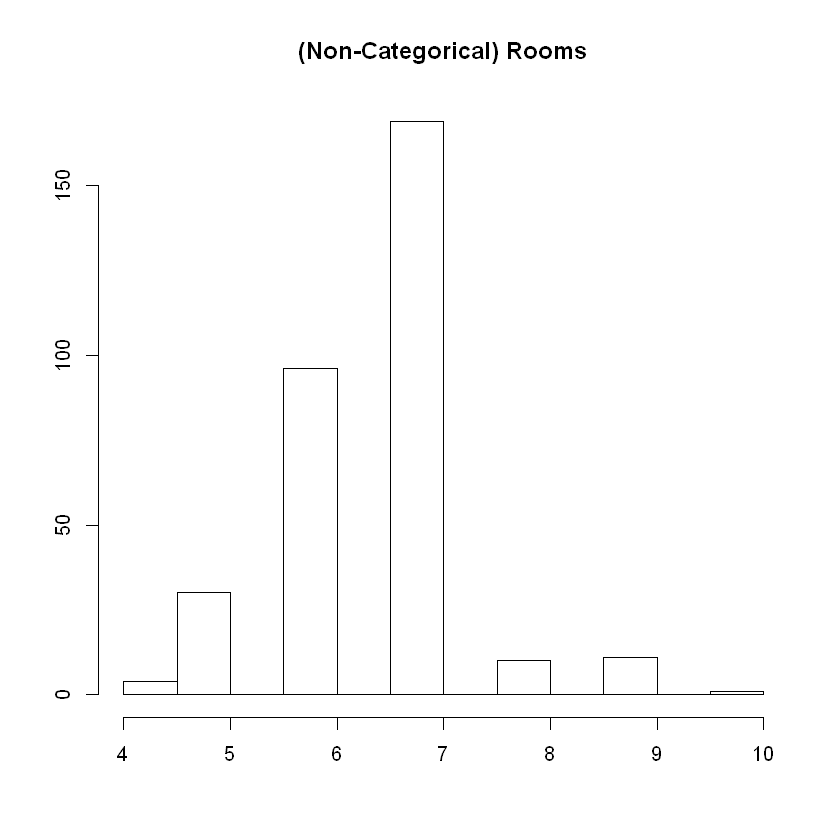

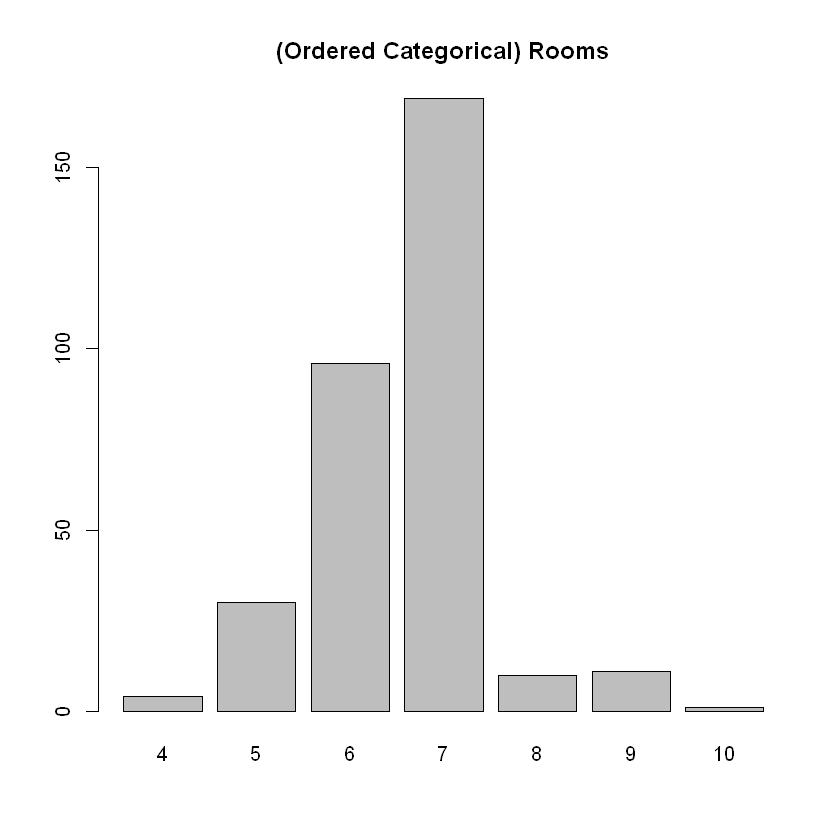

In [3]:
hist(no.factor$rooms,main="(Non-Categorical) Rooms",xlab="",ylab="")
plot(yes.factor$rooms,main="(Ordered Categorical) Rooms",xlab="",ylab="")

💻 The default behavior in regression is to transformed ordered and unordered categorical variable with multiple categories into a set of $c-1$ dummy variables and include them as regressors, where $c$ represents the number of categories.

In [4]:
ols <- lm(lprice ~ lland + larea + I(log(cbd)) +
                   as.factor(y81) + as.factor(rooms) + as.factor(nbh) +
                   linst + linstsq + ldist + baths + age + agesq,
          data=hprice3)

## installing the 'lmtest', 'sandwich' packages if not previously installed
if (!require(lmtest)) install.packages('lmtest')
if (!require(sandwich)) install.packages('sandwich')

## turning 'off' scientific notation
options(scipen = 999) 

## calculating standard t-statistics for 'significance'
coeftest(ols, vcov = vcovHC, type = "HC1")

Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich



t test of coefficients:

                       Estimate   Std. Error t value              Pr(>|t|)    
(Intercept)         3.497413578  2.266536887  1.5431             0.1238762    
lland               0.122178750  0.037345254  3.2716             0.0011950 ** 
larea               0.353527029  0.064960239  5.4422            0.00000011 ***
I(log(cbd))        -0.030909378  0.057676152 -0.5359             0.5924187    
as.factor(y81)1     0.379015730  0.024474885 15.4859 < 0.00000000000000022 ***
as.factor(rooms)5   0.132637038  0.156849504  0.8456             0.3984363    
as.factor(rooms)6   0.061507499  0.158817991  0.3873             0.6988232    
as.factor(rooms)7   0.140493063  0.165317814  0.8498             0.3960984    
as.factor(rooms)8   0.173819280  0.167557064  1.0374             0.3004028    
as.factor(rooms)9   0.290598039  0.183811551  1.5810             0.1149488    
as.factor(rooms)10  0.393247317  0.215237037  1.8270             0.0686934 .  
as.factor(nbh)1    -0.0305

💻 In many machine learning algorithms you are required to provide the design (model) matrix, $\mathbf{X}$ (*without* and intercept), and response vector, $\mathbf{y}$.

**<span style="color:green">Exercise:</span>**: Use the ```model.matrix``` function to extract the design matrix _without_ an intercept from the previously created ```ols``` object and verify it contains 22 columns of regressors/features.

In [5]:
X <- model.matrix(ols)[,-1]
dim(X)
colnames(X)

[1] 321  22

[1] "lland"              "larea"              "I(log(cbd))"       
 [4] "as.factor(y81)1"    "as.factor(rooms)5"  "as.factor(rooms)6" 
 [7] "as.factor(rooms)7"  "as.factor(rooms)8"  "as.factor(rooms)9" 
[10] "as.factor(rooms)10" "as.factor(nbh)1"    "as.factor(nbh)2"   
[13] "as.factor(nbh)3"    "as.factor(nbh)4"    "as.factor(nbh)5"   
[16] "as.factor(nbh)6"    "linst"              "linstsq"           
[19] "ldist"              "baths"              "age"               
[22] "agesq"

📌 It is good practice to define categorical variables _outside_ the model formula/fitting. When doing this, one can easily change the 'base' category using the ```relevel()``` function along with the ```within()``` function.

**<span style="color:green">Exercise:</span>**:
1. Create a copy of the ```hprice3``` data frame, call it ```hprice3.copy``` that contains all the variables used in fitting the model ```ols``` above.

In [6]:
hprice3.copy <- subset(hprice3,select=c("lprice","lland","larea","cbd",
                                        "y81","rooms","nbh","linst",
                                        "linstsq","ldist","baths","age","agesq"))
names(hprice3.copy)

[1] "lprice"  "lland"   "larea"   "cbd"     "y81"     "rooms"   "nbh"    
 [8] "linst"   "linstsq" "ldist"   "baths"   "age"     "agesq"

2. Add the variable ```lcbd``` which equals the natural logarithm of ```cbd``` and then drop ```cbd``` from ```hprice3.copy```.

In [7]:
hprice3.copy$lcbd <- log(hprice3.copy$cbd)
hprice3.copy <- subset(hprice3.copy,select=-c(cbd))
names(hprice3.copy)

[1] "lprice"  "lland"   "larea"   "y81"     "rooms"   "nbh"     "linst"  
 [8] "linstsq" "ldist"   "baths"   "age"     "agesq"   "lcbd"

3. Replace ```y81```, ```rooms```, and ```nbh``` by their factor versions in ```hprice3.copy```.

In [8]:
hprice3.copy$y81 <- factor(hprice3.copy$y81)
hprice3.copy$rooms <- factor(hprice3.copy$rooms,ordered=TRUE)
hprice3.copy$nbh <- factor(hprice3.copy$nbh,ordered=FALSE)
head(hprice3.copy)

lprice,lland,larea,y81,rooms,nbh,linst,linstsq,ldist,baths,age,agesq,lcbd
<dbl>,<dbl>,<dbl>,<fct>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
11.00210,8.429017,7.414573,0,7,4,6.9078,47.71770,9.277999,1,48,2304,8.006368
10.59663,9.032409,7.867871,0,6,4,6.9078,47.71770,9.305651,2,83,6889,8.294050
10.43412,8.517193,7.042286,0,6,4,6.9078,47.71770,9.350102,1,58,3364,8.294050
11.06507,9.210340,7.035269,0,5,4,6.9078,47.71770,9.384294,1,11,121,8.294050
10.69195,9.210340,7.532624,0,5,4,7.6009,57.77368,9.400961,1,48,2304,8.294050
10.73640,9.159047,7.484369,0,6,4,7.6009,57.77368,9.210340,3,78,6084,8.006368


4. Make ```y81==1``` and ```nbh==3``` the base categories in ```hprice3.copy```

In [9]:
hprice3.copy <- within(hprice3.copy, y81 <- relevel(y81,ref=2))
hprice3.copy <- within(hprice3.copy, nbh <- relevel(nbh,ref=4))

5. Run a regression of ```lprice``` on all the other features in the ```hprice3.copy``` and report the outcome.

In [10]:
ols.sim <- lm(lprice~.,data=hprice3.copy)
coef(ols.sim)

(Intercept)          lland          larea           y810        rooms.L 
 3.84787665910  0.12217874953  0.35352702890 -0.37901572957  0.30387885040 
       rooms.Q        rooms.C        rooms^4        rooms^5        rooms^6 
 0.07618903046  0.05020414401 -0.05677977146  0.03523806675 -0.04691599284 
          nbh0           nbh1           nbh2           nbh4           nbh5 
 0.19888153942  0.16834290141  0.14204541038  0.18532823199  0.12696394765 
          nbh6          linst        linstsq          ldist          baths 
 0.15061449534  0.62278986679 -0.03842626984  0.14169727999  0.09896408018 
           age          agesq           lcbd 
-0.00685451709  0.00002741086 -0.03090937814

## Including [Interaction Terms](https://en.wikipedia.org/wiki/Interaction_(statistics) )

In the previously fitted model we included ```linstsq``` and ```agesq``` as predictors. These correspond to the squared of the original predictors ```linst``` and ```age```. In economics we include such predictors to account for increasing/decreasing returns to scale in modelling. Since $\texttt{linst}^2=\texttt{linst}\times\texttt{linst}$ and $\texttt{age}^2=\texttt{age}\times\texttt{age}$, one can think of them as a specific type of interaction terms (products with themselves).

<ins>Example</ins>: Consider the following version of the previously estimated model

$$
\begin{aligned}
\texttt{lprice}&=\beta_0+\beta_1\texttt{lland}+\beta_2\texttt{larea}+ \beta_3\texttt{linst}+\beta_4\texttt{age}\\
               & + \beta_5\texttt{linst}\times\texttt{age}+\beta_6\texttt{linst}^2+\beta_7\texttt{age}^2+e
\end{aligned}
$$

In [11]:
## OLS: estimating this new model
ols.0 <- lm(lprice ~ lland + larea + linst + age
                     + I(linst*age) + linstsq + agesq,
          data=hprice3)
round(coef(ols.0),5)

(Intercept)          lland          larea          linst            age 
       2.25472        0.10212        0.63839        0.85279       -0.01741 
I(linst * age)        linstsq          agesq 
       0.00074       -0.05226        0.00004

By defining $\mathbf{x}=[\texttt{lland},\texttt{larea},\texttt{linst},\texttt{age}]^\prime$, and Assumption MLR.4, one has

$$
\frac{\partial E[\texttt{lprice}|\mathbf{x}]}{\partial \texttt{linst}}=\beta_3+\beta_5\texttt{age}+2\beta_6\texttt{linst}.
$$

Then $\beta_3$ represents the average price elasticty with respect to the distance from the highway for a home that is brand new ($\texttt{age}=0$) and that is located 1 feet away from the highway ($\texttt{linst}=\log(\texttt{inst})=0$, i.e., $\texttt{inst}=1$).

💻 Calculating the summary statistics for variables ```age``` and ```inst``` in the data set.

In [12]:
## printing summary statistics for 'age' and 'inst'
print(summary(subset(hprice3,select=c("age","inst","linst"))))

      age              inst           linst       
 Min.   :  0.00   Min.   : 1000   Min.   : 6.908  
 1st Qu.:  0.00   1st Qu.: 9000   1st Qu.: 9.105  
 Median :  4.00   Median :16000   Median : 9.680  
 Mean   : 18.01   Mean   :16442   Mean   : 9.481  
 3rd Qu.: 22.00   3rd Qu.:24000   3rd Qu.:10.086  
 Max.   :189.00   Max.   :34000   Max.   :10.434  


Now consider the following alternative specification

$$
\begin{aligned}
\texttt{lprice}&=\delta_0+\beta_1\texttt{lland}+\beta_2\texttt{larea}+ \delta_3\texttt{linst}+\delta_4\texttt{age}\\
               & + \beta_5[\texttt{linst}-\mu_{\texttt{linst}}]\times[\texttt{age}-\mu_{\texttt{age}}]+\beta_6[\texttt{linst}-\mu_{\texttt{linst}}]^2+\beta_7[\texttt{age}-\mu_{\texttt{age}}]^2+e.
\end{aligned}
$$

In this case

$$
\frac{\partial E[\texttt{lprice}|\mathbf{x}]}{\partial \texttt{linst}}=\delta_3+\beta_5[\texttt{age}-\mu_{\texttt{age}}]+2\beta_6[\texttt{linst}-\mu_{\texttt{linst}}].
$$

Then $\delta_3$ represents the average price elasticty with respect to the distance from the highway for a home that is 18 years old ($\widehat{\mu}_{\texttt{age}}\approx 18.01$) and that is located 16,442 feet away from the highway ($\widehat{\mu}_{\texttt{inst}}\approx 16,442$).

In [13]:
## OLS: estimating this new 'version' model
ols.1 <- lm(lprice ~ lland + larea + linst + age
                     + I((linst-log(mean(inst)))*(age-mean(age)))
                     + I((linst-log(mean(inst)))^2) + I((age-mean(age))^2),
          data=hprice3)

## printing ols results up to 5 decimals
round(data.frame(ols.0=coef(ols.0),ols.1=coef(ols.1)),5)

,ols.0,ols.1
,<dbl>,<dbl>
(Intercept),2.25472,7.03626
lland,0.10212,0.10212
larea,0.63839,0.63839
linst,0.85279,-0.14856
age,-0.01741,-0.00865
I(linst * age),0.00074,0.00074
linstsq,-0.05226,-0.05226
agesq,0.00004,0.00004


⁉️ Is it a coincidence that some of the estimates are the same in both specifications? provide an algebraic explanation.

## Beta Coefficients

Why is standardization useful? It is easiest to start with the original OLS equation, with the variables in their original forms:

$$
y_{i}=\widehat{\beta}_{0}+\widehat{\beta}_{1} x_{i 1}+\widehat{\beta}_{2} x_{i 2}+\ldots+\widehat{\beta}_{k} x_{i k}+\hat{e}_{i}.
$$

We have included the observation subscript i to emphasize that our standardization is applied to all sample values. If we average the previous equation and use the fact that $\{\widehat{e}_i:i=1,\ldots,n\}$ has sample mean zero one has

$$
y_{i}-\overline{y}=\widehat{\beta}_{1}\left(x_{i 1}-\overline{x}_{1}\right)+\widehat{\beta}_{2}\left(x_{i 2}-\overline{x}_{2}\right)+\ldots+\widehat{\beta}_{k}\left(x_{i k}-\overline{x}_{k}\right)+\widehat{e}_{i}.
$$

Now, let $\widehat{\sigma}_{y}$ be the sample standard deviation for the dependent variable, let $\widehat{\sigma}_{1}$ be the sample sd for $x_{1}$, let $\widehat{\sigma}_{2}$ be the sample standard deviation, ```sd()```, for $x_{2}$, and so on. Then, simple algebra gives the equation

$$
\begin{aligned}
\left(y_{i}-\overline{y}\right) / \widehat{\sigma}_{y} &=\left(\widehat{\sigma}_{1} / \widehat{\sigma}_{y}\right) \widehat{\beta}_{1}\left[\left(x_{i 1}-\overline{x}_{1}\right) / \widehat{\sigma}_{1}\right]+\ldots \\ &+\left(\widehat{\sigma}_{k} / \widehat{\sigma}_{y}\right) \widehat{\beta}_{k}\left[\left(x_{i k}-\overline{x}_{k}\right) / \widehat{\sigma}_{k}\right]+\left(\widehat{e}_{i} / \widehat{\sigma}_{y}\right).
\end{aligned}
$$

Now define $z_{i y}=\left(y_{i}-\overline{y}\right) / \widehat{\sigma}_{y}$, $z_{i l}=\left[\left(x_{i l}-\overline{x}_{l}\right) / \widehat{\sigma}_{l}\right]$, $\widehat{b}_{l}=\left(\widehat{\sigma}_{l} / \widehat{\sigma}_{y}\right) \widehat{\beta}_{l}$ for $l=1,\ldots,k$, and $\widehat{\varepsilon}_i=\left(\widehat{e}_{i} / \widehat{\sigma}_{y}\right)$. Then

$$
z_{y}=\widehat{b}_{1} z_{1}+\widehat{b}_{2} z_{2}+\ldots+\widehat{b}_{k} z_{k}+\widehat{\varepsilon}_i.
$$

The new coefficients are

$$
\widehat{b}_{j}=\left(\widehat{\sigma}_{j} / \widehat{\sigma}_{y}\right) \widehat{\beta}_{j} \text { for } j=1, \ldots, k.
$$

These $\widehat{b}_{j}$ are traditionally called **standardized coefficients** or **beta coefficients**.

✍🏽 If $x_l$ increases by one standard deviation, then $\widehat{y}$ changes by $\widehat{b}_l$ standard deviations. Thus, *we are measuring effects not in terms of the original units of $y$ or the $x_l$, but in standard deviation units*.

In [14]:
## installing the 'lm.beta' package if not previously installed
if (!require(lm.beta)) install.packages('lm.beta')

lm.beta(ols.1)

Loading required package: lm.beta



Call:
lm(formula = lprice ~ lland + larea + linst + age + I((linst - 
    log(mean(inst))) * (age - mean(age))) + I((linst - log(mean(inst)))^2) + 
    I((age - mean(age))^2), data = hprice3)

Standardized Coefficients::
                                     (Intercept) 
                                      0.00000000 
                                           lland 
                                      0.18685413 
                                           larea 
                                      0.49640630 
                                           linst 
                                     -0.26349631 
                                             age 
                                     -0.64300498 
I((linst - log(mean(inst))) * (age - mean(age))) 
                                      0.05000987 
                  I((linst - log(mean(inst)))^2) 
                                     -0.15421830 
                          I((age - mean(age))^2) 
                            

💻 Since each $x_l$ have been standardized, comparing the _magnitudes_ of the resulting beta coefficients is now useful. The ```age``` of the house seems to have the largest effect on the price of a home.

<ins>Pre-Processing in Machine Learning</ins>: In machine learning, standardizing (*re-centering* and *scaling*) predictors is commonly done before model fitting. No transformation is usually done to the outcome variable.

In [15]:
X1 <- model.matrix(ols.1)[,-1]
datos <- cbind(data.frame(lprice=hprice3$lprice),as.data.frame(X1))

## installing the 'caret' package if not previously installed
if (!require(caret)) install.packages('caret')

modelo <- train(lprice ~ .,
               data = datos,
               method = "lm",
               preProcess = c('scale', 'center')
               )

coef(modelo$finalModel)

Loading required package: caret
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2


(Intercept) 
                                             11.37811794 
                                                   lland 
                                              0.08187470 
                                                   larea 
                                              0.21751254 
                                                   linst 
                                             -0.11545734 
                                                     age 
                                             -0.28174834 
`\\`I((linst - log(mean(inst))) * (age - mean(age)))\\`` 
                                              0.02191305 
                  `\\`I((linst - log(mean(inst)))^2)\\`` 
                                             -0.06757452 
                          `\\`I((age - mean(age))^2)\\`` 
                                              0.16427378